In [14]:
!pip install tensorflow matplotlib scikit-learn
!pip install numpy==1.24.3

  Using cached numpy-2.1.3-cp310-cp310-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.1.3-cp310-cp310-win_amd64.whl (12.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3


  You can safely remove it manually.


  Using cached numpy-1.24.3-cp310-cp310-win_amd64.whl.metadata (5.6 kB)
Using cached numpy-1.24.3-cp310-cp310-win_amd64.whl (14.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.3
    Uninstalling numpy-2.1.3:
      Successfully uninstalled numpy-2.1.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 1.24.3 which is incompatible.


In [15]:
# Parte 1 – Importação de bibliotecas
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix

# Verificar GPU disponível (opcional)
print("Dispositivos disponíveis:", tf.config.list_physical_devices())


Dispositivos disponíveis: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [16]:
# Parte 2 – Definição dos diretórios locais

# Altere para o caminho onde suas imagens estão armazenadas
base_dir = 'C:\\Users\\User\\Desktop\\IA\\Dogs-Vs-cats'  # exemplo no Windows

train_dir = os.path.join(base_dir, 'train')  # contém /cats e /dogs
test_dir = os.path.join(base_dir, 'test1')    # contém /cats e /dogs


In [17]:
# Definir o tamanho das imagens
IMAGE_SIZE = (150, 150)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Defina aqui o caminho para a pasta que contém as subpastas 'cats' e 'dogs'
base_dir = r'C:\\Users\\User\\Desktop\\IA\\Dogs-Vs-cats'  # Ajuste para seu caminho correto

# Verifica se o caminho base existe
if not os.path.exists(base_dir):
    raise FileNotFoundError(f"O caminho base não foi encontrado: {base_dir}")

# Parâmetros
BATCH_SIZE = 32
IMAGE_SIZE = (150, 150)
EPOCHS = 10

# Preparação do ImageDataGenerator com aumento de dados e validação
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3  # 30% dos dados para validação
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'  # usar a parte de treino
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'  # usar a parte de validação
)

print("\nPronto para iniciar o treinamento com os geradores configurados.")


Found 26250 images belonging to 1 classes.
Found 11250 images belonging to 1 classes.

Pronto para iniciar o treinamento com os geradores configurados.


In [23]:
# Parte 5 – Treinamento

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=1,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

821/821 ━━━━━━━━━━━━━━━━━━━━ 327s 398ms/step - accuracy: 1.0000 - loss: 5.0750e-17 - val_accuracy: 1.0000 - val_loss: 2.1298e-15


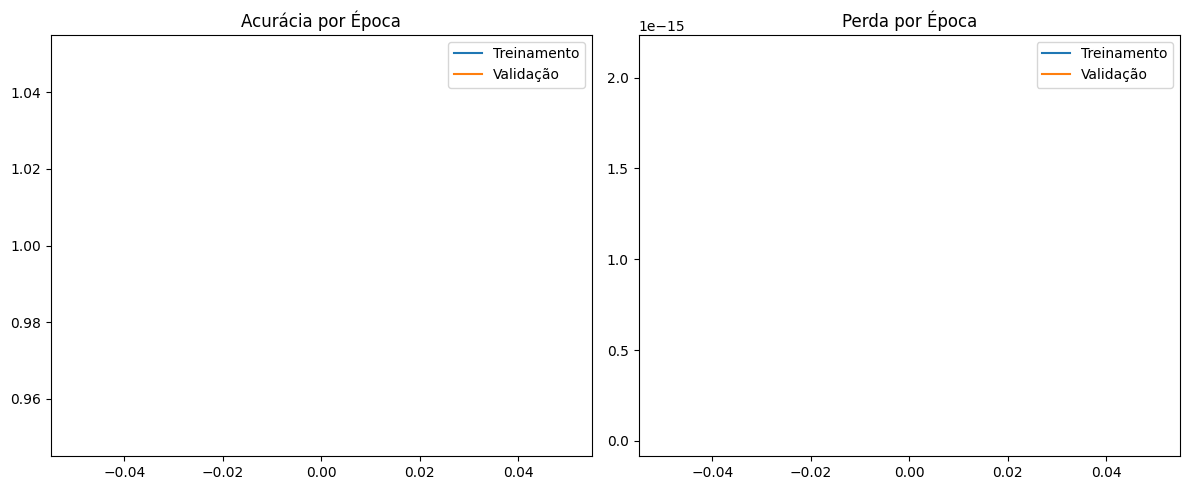

In [25]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Treinamento')
plt.plot(epochs_range, val_acc, label='Validação')
plt.title('Acurácia por Época')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Treinamento')
plt.plot(epochs_range, val_loss, label='Validação')
plt.title('Perda por Época')
plt.legend()

plt.tight_layout()
plt.show()


In [28]:
import numpy as np
from sklearn.metrics import classification_report

# Parte 7 – Avaliação com o conjunto de teste (usando validation_split)

test_split = 0.15  # 15% dos dados para teste

test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=test_split
)

test_generator = test_datagen.flow_from_directory(
    base_dir,              # mesma pasta base das imagens
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation',   # usa a parte reservada para validação/teste
    shuffle=False
)

# Previsões
predictions = model.predict(test_generator)
y_pred = (predictions > 0.5).astype(int).flatten()  # flatten para garantir formato correto
y_true = test_generator.classes

# Detecta as classes presentes no conjunto de teste
unique_classes = np.unique(y_true)
target_names = ['Cat', 'Dog']
labels_present = unique_classes.tolist()

print(f"Classes presentes no teste: {labels_present}")

# Gera o relatório de classificação usando somente as classes presentes
print("Relatório de Classificação:")
print(classification_report(
    y_true,
    y_pred,
    labels=labels_present,
    target_names=[target_names[i] for i in labels_present]
))


Found 5625 images belonging to 1 classes.
  1/176 ━━━━━━━━━━━━━━━━━━━━ 11s 67ms/step

c:\Users\User\Desktop\IA\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


176/176 ━━━━━━━━━━━━━━━━━━━━ 7s 41ms/step
Classes presentes no teste: [0]
Relatório de Classificação:
              precision    recall  f1-score   support

         Cat       1.00      1.00      1.00      5625

    accuracy                           1.00      5625
   macro avg       1.00      1.00      1.00      5625
weighted avg       1.00      1.00      1.00      5625



In [ ]:
# Parte 8 – Teste com imagem externa

from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.

    prediction = model.predict(img_array)[0][0]
    classe = 'Dog' if prediction > 0.5 else 'Cat'
    prob = prediction if prediction > 0.5 else 1 - prediction

    print(f"Classe: {classe} ({prob:.2f})")
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Predição: {classe}')
    plt.show()

# Exemplo:
predict_image('C:\\Users\\User\\Desktop\\IA\\Dogs-Vs-cats\\testealfredo.jpg')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\User\\Desktop\\IA\\Dogs-Vs-cats\\testealfredo.jpeg'